# 순환 신경망

순차 데이터에 잘 맞는 인공 신경망의 한 종류이다. 순환층이 포함된 신경망이다.

*   순차 데이터: 텍스트나 시계열 데이터처럼 순서가 의미가 있는 데이터
*   시퀀스: 순차 데이터의 샘플 하나를 의미한다. 시퀀스의 길이는 타임스텝의 개수다.
*   타임스텝: 입력과 이전 은닉 상태에 가중치를 곱하고 절편을 더하고 활성화 함수를 적용하는 하나의 단계
*   (문장 → 샘플, 시퀀스)
*   (단어 → 토큰, 타임스텝)










# 순환층

셀이라고도 부른다. 여러 개의 뉴런으로 구성된다. 셀의 출력을 은닉 상태라고 부른다. 은닉 상태는 셀의 다음 타임스텝으로 전달된다. 셀은 기본적으로 마지막 타임스텝의 은닉 상태만 최종 출력으로 내보낸다. 순환층의 입력과 출력의 크기는 다음과 같다.

*   전체 샘플 기준: (샘플 수, 시퀀스 길이, 단어 표현) → (샘플 수, 뉴런 개수)
*   샘플 하나 기준: (시퀀스 길이, 단어 표현) → (뉴런 개수)



순환층은 텍스트 데이터를 숫자 데이터로 바꿔서 학습한다.  

1.   텍스트를 소문자로 바꾸고 구둣점을 삭제하고 공백으로 문자열을 구분한다. 이렇게 분리된 단어를 토큰이라고 한다.
2.   토큰마다 고유한 정수를 부여한다. 정수의 개수는 어휘 사전의 크기다. 훈련 세트에서 고유한 단어 목록을 어휘 사전이라고 한다.
3.   정숫값의 크기 속성을 없애기 위해 원-핫 인코딩 혹은 단어 임베딩을 적용한다.

*   원-핫 인코딩: 어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터다. 정수로 변환된 토큰을 원-핫 인코딩으로 변환하면 어휘 사전 크기의 벡터가 만들어진다.
*   단어 임베딩: 정수로 변환된 토큰을 실수 밀집 벡터로 변환한다. 자연어 처리에서 좋은 성능을 발휘한다.

---

imdb 리뷰 데이터를 긍정과 부정으로 분류하는 순환 신경망을 생성해보자


In [ ]:
### 데이터 준비

# num_words 매개변수: 어휘 사전의 크기를 지정한다

from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

train_input.shape, val_input.shape, test_input.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((20000,), (5000,), (25000,))

239.00925 178.0


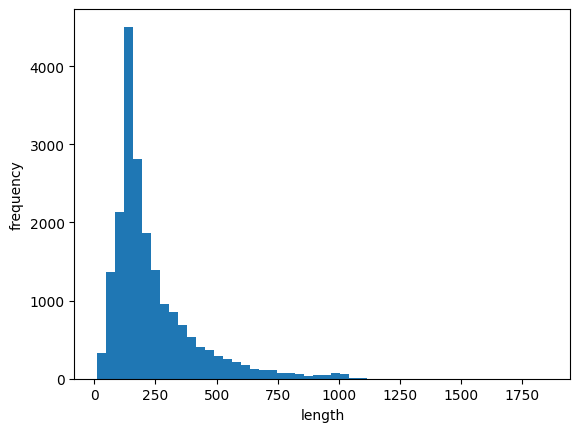

In [ ]:
## 훈련 데이터 분석

import numpy as np
import matplotlib.pyplot as plt

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))
plt.hist(lengths, bins=50)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
## pad_sequences() 함수: 시퀀스의 길이를 하나로 통일한다
## 길이가 긴 경우: 데이터의 앞부분을 잘라낸다
## 길이가 짧은 경우: 데이터의 앞부분을 0으로 패딩한다
# maxlen 매개변수: 시퀀스의 길이를 지정한다

from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
train_seq.shape

(20000, 100)

In [ ]:
### 모델 훈련

## SimpleRNN 클래스: 케라스에서 순환층 클래스를 생성하는 클래스
## SimpleRNN(뉴런의 개수)

from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200), activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## 1. 원-핫 인코딩

## to_categorical() 함수: 원-핫 인코딩을 적용하여 반환한다
## (샘플의 개수, 토큰의 개수) → (샘플의 개수, 토큰의 개수, 어휘사전의 크기)

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

train_oh.shape

(20000, 100, 200)

In [ ]:
print(train_seq[0][0])
print(train_oh[0][0])

10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
## 2. 단어 임베딩

## Embedding 클래스: 임베딩 기능을 제공하는 클래스
## Embedding(어휘 사전의 크기, 임베딩 벡터의 크기, input_length 매개변수)

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(200, 16, input_length=100, input_shape=(100,)))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## 원-핫 인코딩 모델 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.4945 - loss: 0.7135 - val_accuracy: 0.4924 - val_loss: 0.7053
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5020 - loss: 0.7038 - val_accuracy: 0.4960 - val_loss: 0.7010
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5059 - loss: 0.6993 - val_accuracy: 0.4962 - val_loss: 0.6984
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5124 - loss: 0.6964 - val_accuracy: 0.5038 - val_loss: 0.6962
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5154 - loss: 0.6943 - val_accuracy: 0.5110 - val_loss: 0.6939
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.5120 - val_loss: 0.6925
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5228 - loss: 0.6915 - val_accuracy: 0.5162 - val_loss: 0.6917
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5255 - loss: 0.6905

In [ ]:
## 단어 임베딩 모델 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history2 = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5096 - loss: 0.6937 - val_accuracy: 0.6108 - val_loss: 0.6764
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6264 - loss: 0.6719 - val_accuracy: 0.6544 - val_loss: 0.6605
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6600 - loss: 0.6577 - val_accuracy: 0.6786 - val_loss: 0.6466
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6802 - loss: 0.6438 - val_accuracy: 0.6916 - val_loss: 0.6347
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6897 - loss: 0.6316 - val_accuracy: 0.6596 - val_loss: 0.6366
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6973 - loss: 0.6199 - val_accuracy: 0.7086 - val_loss: 0.6108
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7087 - loss: 0.6071 - val_accuracy: 0.7092 - val_loss: 0.6007
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7112 - loss: 0.597

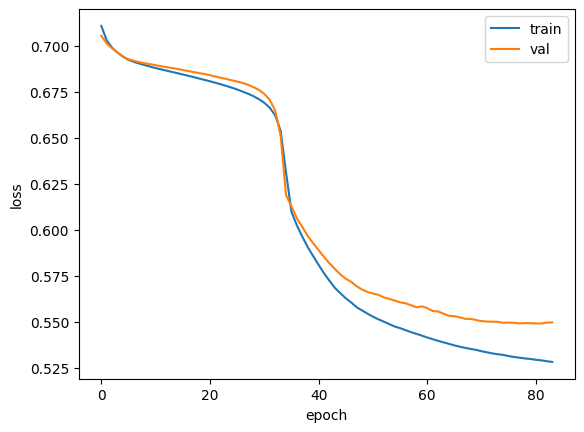

In [ ]:
## 원-핫 인코딩 모델 평가

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

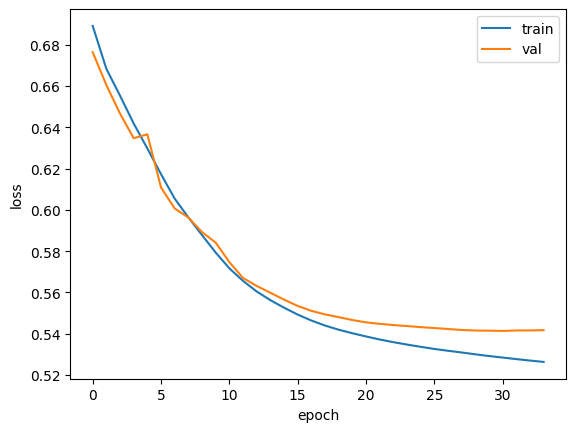

In [ ]:
## 단어 임베딩 모델 평가

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()